
# Kerala Covid-19 Data Analysis



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Covid_data_kerala.csv ")

In [3]:
data.head()

,Date,Confirmed,Recovered,Deceased
0,30-01-2020,NaN,NaN,NaN
1,31-01-2020,0.0,NaN,0.0
2,01-02-2020,0.0,NaN,0.0
3,02-02-2020,1.0,NaN,0.0
4,03-02-2020,1.0,NaN,0.0


In [4]:
data.tail()

,Date,Confirmed,Recovered,Deceased
493,06-06-2021,14672.0,21429.0,227.0
494,07-06-2021,9313.0,21921.0,211.0
495,08-06-2021,15567.0,20019.0,124.0
496,09-06-2021,16204.0,20237.0,156.0
497,10-06-2021,14424.0,17994.0,194.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       498 non-null    object 
 1   Confirmed  497 non-null    float64
 2   Recovered  441 non-null    float64
 3   Deceased   497 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.7+ KB


In [6]:
data.isnull().sum()

Date          0
Confirmed     1
Recovered    57
Deceased      1
dtype: int64

In [7]:
data['Confirmed']=data['Confirmed'].fillna(data['Confirmed'].median())
data['Recovered']=data['Recovered'].fillna(data['Recovered'].median())
data['Deceased']=data['Deceased'].fillna(data['Deceased'].median())

In [8]:
data.isnull().sum()

Date         0
Confirmed    0
Recovered    0
Deceased     0
dtype: int64

In [9]:
data.shape

(498, 4)

In [10]:
data.describe()

,Confirmed,Recovered,Deceased
count,498.000000,498.000000,498.000000
mean,5403.879518,5493.020080,21.375502
std,8561.964607,9037.796895,37.899177
min,0.000000,0.000000,0.000000
25%,75.750000,755.500000,0.000000
50%,2543.000000,3391.000000,14.000000
75%,5998.000000,5657.000000,23.750000
max,43529.000000,99651.000000,227.000000


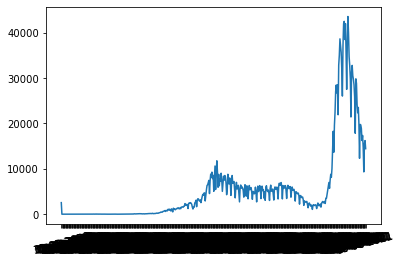

In [11]:
x= data['Date']
y = data['Confirmed']
plt.plot(x,y)
plt.xticks(rotation=15)
plt.show()

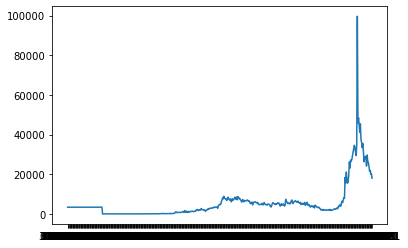

In [12]:
x = data['Date']
y = data['Recovered']
plt.plot(x,y)
plt.show()

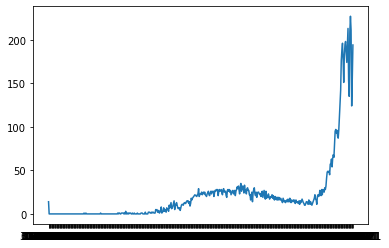

In [13]:
x = data['Date']
y = data['Deceased']
plt.plot(x,y)
plt.show()

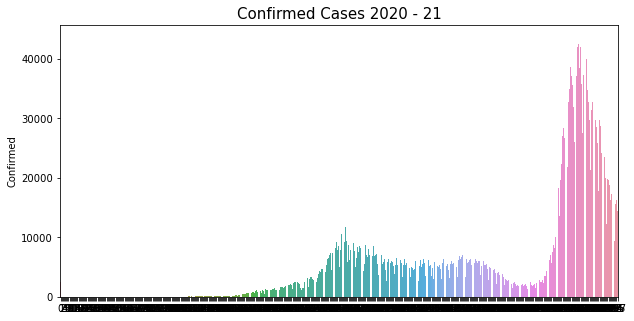

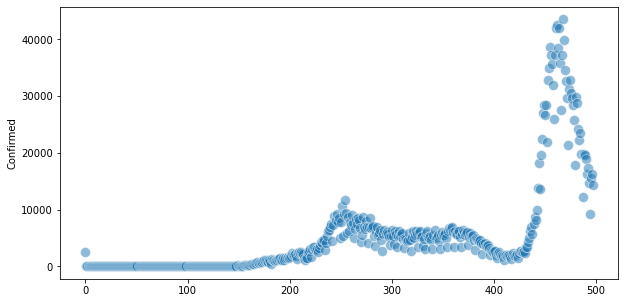

In [14]:
plt.figure(figsize=(10,5))
plt.title('Confirmed Cases 2020 - 21', fontsize=15)
sns.barplot(data.index, data.Confirmed)
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(data.index, data.Confirmed, 
                s=100, alpha=0.5)
plt.show()

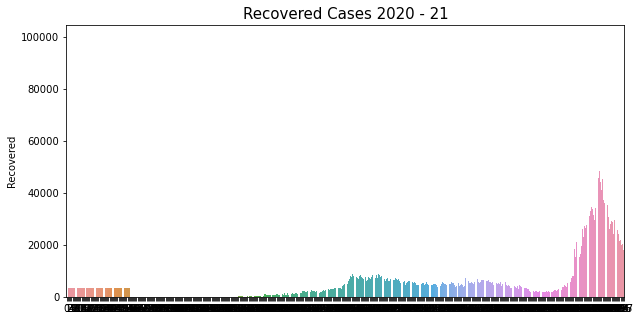

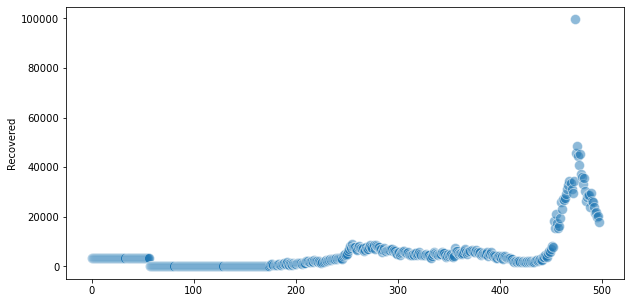

In [15]:
plt.figure(figsize=(10,5))
plt.title('Recovered Cases 2020 - 21', fontsize=15)
sns.barplot(data.index, data.Recovered)
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(data.index, data.Recovered, 
                s=100, alpha=0.5)
plt.show()

# Year-wise Analysis

In [16]:
data['Date'] = pd.to_datetime(data['Date'], utc=True)
data = data.set_index('Date')
data

,Confirmed,Recovered,Deceased
Date,,,
2020-01-30 00:00:00+00:00,2543.0,3391.0,14.0
2020-01-31 00:00:00+00:00,0.0,3391.0,0.0
2020-01-02 00:00:00+00:00,0.0,3391.0,0.0
2020-02-02 00:00:00+00:00,1.0,3391.0,0.0
2020-03-02 00:00:00+00:00,1.0,3391.0,0.0
...,...,...,...
2021-06-06 00:00:00+00:00,14672.0,21429.0,227.0
2021-07-06 00:00:00+00:00,9313.0,21921.0,211.0
2021-08-06 00:00:00+00:00,15567.0,20019.0,124.0


In [17]:
data.index.year.unique()


Int64Index([2020, 2021], dtype='int64', name='Date')

In [18]:
data20 = data[data.index.year == 2020]
data21 = data[data.index.year == 2021]
print(data20.head())
print(data21.head())

                           Confirmed  Recovered  Deceased
Date                                                     
2020-01-30 00:00:00+00:00     2543.0     3391.0      14.0
2020-01-31 00:00:00+00:00        0.0     3391.0       0.0
2020-01-02 00:00:00+00:00        0.0     3391.0       0.0
2020-02-02 00:00:00+00:00        1.0     3391.0       0.0
2020-03-02 00:00:00+00:00        1.0     3391.0       0.0
                           Confirmed  Recovered  Deceased
Date                                                     
2021-01-01 00:00:00+00:00     4991.0     5111.0      23.0
2021-02-01 00:00:00+00:00     5328.0     4985.0      21.0
2021-03-01 00:00:00+00:00     4600.0     4668.0      25.0
2021-04-01 00:00:00+00:00     3021.0     5145.0      19.0
2021-05-01 00:00:00+00:00     5615.0     4922.0      24.0


In [19]:
print('Covid19 Confirmed Cases')
print(f'2020: {int(data20.Confirmed.sum())}')
print(f'2021: {int(data21.Confirmed.sum())}')

Covid19 Confirmed Cases
2020: 763475
2021: 1927657


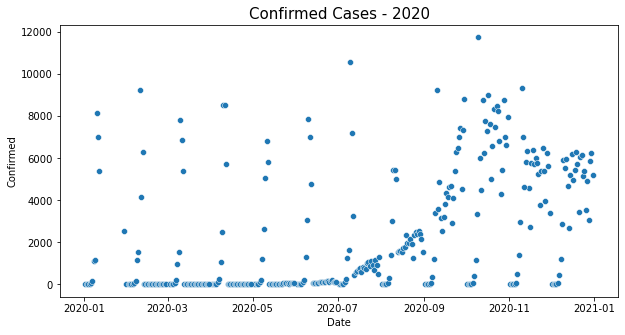

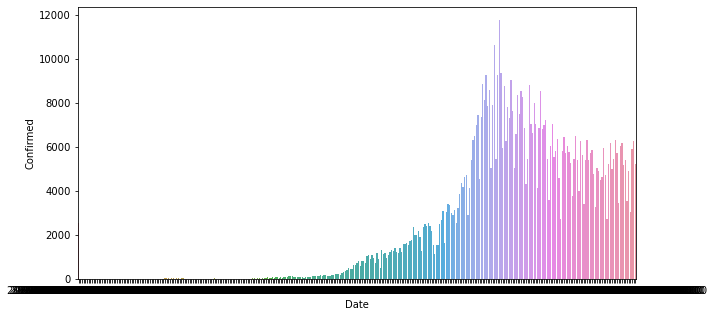

In [20]:
plt.figure(figsize=(10,5))
plt.title('Confirmed Cases - 2020', fontsize=15)
sns.scatterplot(data20.index, data20.Confirmed)
plt.show()
plt.figure(figsize=(10,5))
sns.barplot(data20.index, data20.Confirmed)
plt.show()

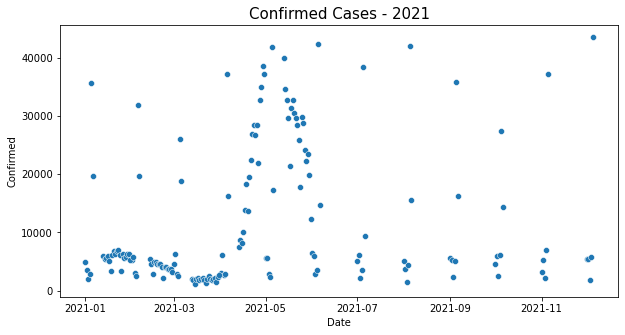

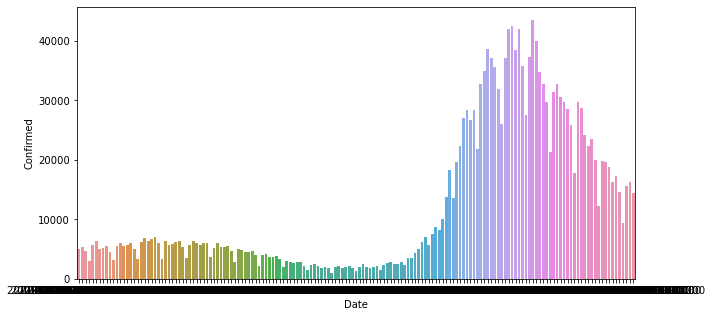

In [21]:
plt.figure(figsize=(10,5))
plt.title('Confirmed Cases - 2021', fontsize=15)
sns.scatterplot(data21.index, data21.Confirmed)
plt.show()
plt.figure(figsize=(10,5))
sns.barplot(data21.index, data21.Confirmed)
plt.show()

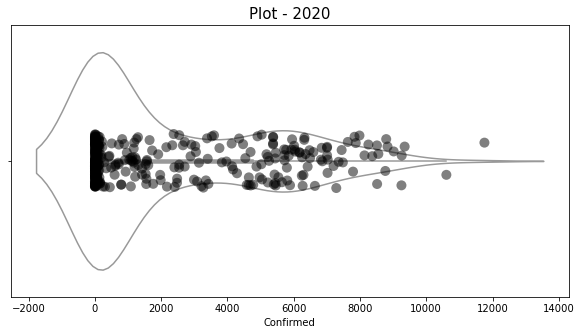

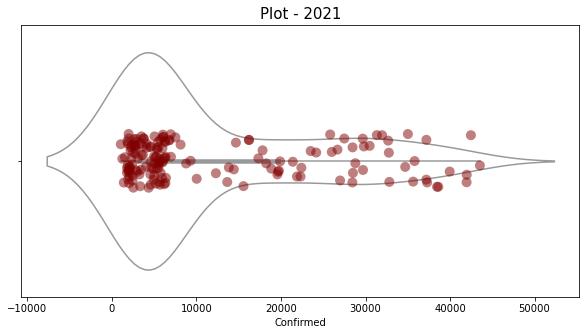

In [22]:
# Violinplot vs Stripplot
plt.figure(figsize=(10,5))
plt.title('Plot - 2020', fontsize=15)
sns.violinplot(data20.Confirmed, color='white')
sns.stripplot(data20.Confirmed, color='black', 
              s=10, alpha=0.5)
plt.show()
plt.figure(figsize=(10,5))
plt.title('Plot - 2021', fontsize=15)
sns.violinplot(data21.Confirmed, color='white')
sns.stripplot(data21.Confirmed, color='maroon', 
              s=10, alpha=0.5)
plt.show()

# Month-wise Analysis

In [23]:
index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

month = pd.DataFrame({'Month': index,
          'Y2020': data20.resample('M').sum().reset_index().Confirmed,
          'Y2021': data21.resample('M').sum().reset_index().Confirmed}).set_index('Month')
month

,Y2020,Y2021
Month,,
Jan,25579.0,177995.0
Feb,22698.0,133461.0
Mar,23112.0,98267.0
Apr,26816.0,466261.0
May,22652.0,591284.0
Jun,26464.0,75765.0
Jul,40105.0,64501.0
Aug,58006.0,72187.0
Sep,113748.0,70126.0


In [24]:
month.describe()

,Y2020,Y2021
count,12.000000,12.000000
mean,63622.916667,160638.083333
std,51216.573281,177638.511367
min,22652.000000,54800.000000
25%,24962.250000,63852.000000
50%,33460.500000,73976.000000
75%,114895.000000,144594.500000
max,165244.000000,591284.000000


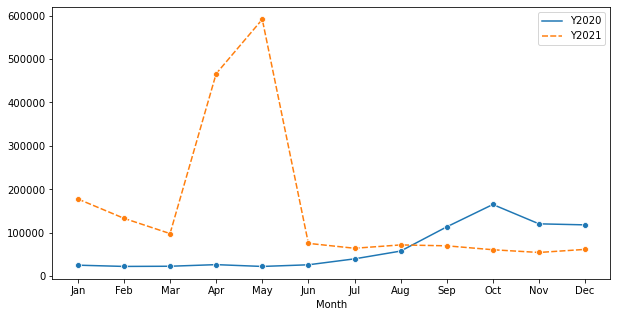

In [25]:
plt.figure(figsize=(10,5))
sns.lineplot(data=month, marker='o')
plt.show()

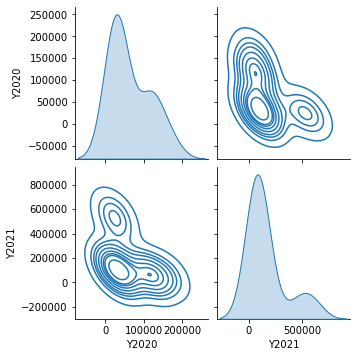

In [26]:
sns.pairplot(month, kind='kde')
plt.show()

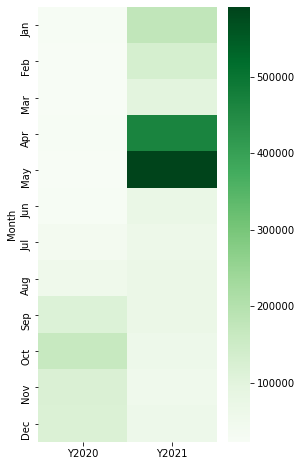

In [27]:
plt.figure(figsize=(4,8))
sns.heatmap(month, cmap='Greens')
plt.show()

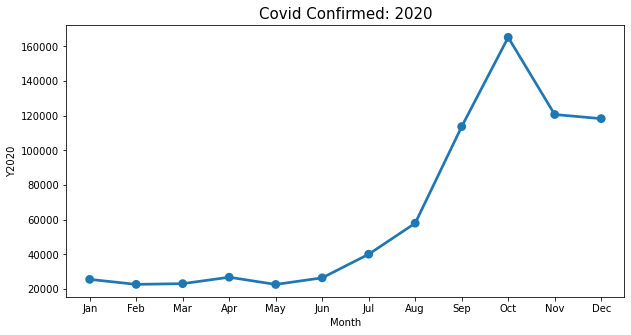

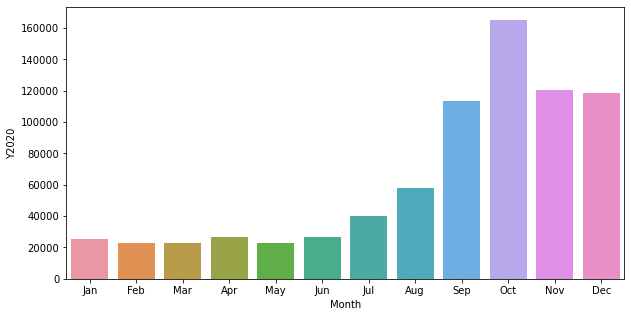

In [28]:
plt.figure(figsize=(10,5))
plt.title('Covid Confirmed: 2020', fontsize=15)
sns.pointplot(month.index, month.Y2020)
plt.show()
plt.figure(figsize=(10,5))
sns.barplot(month.index, month.Y2020)
plt.show()

### From the above graph it is clear that in the Month OCT shows the highest  Confirmed Casess

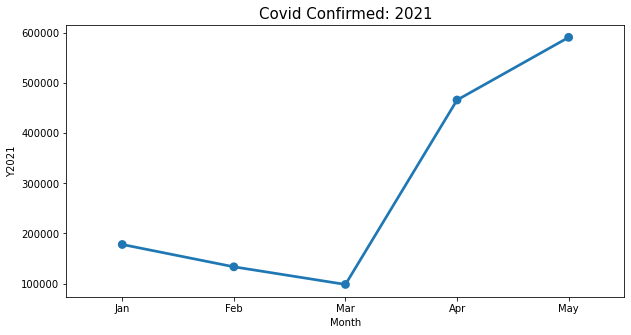

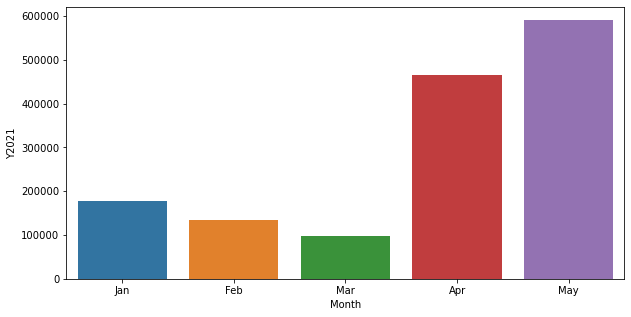

In [29]:
plt.figure(figsize=(10,5))
plt.title('Covid Confirmed: 2021', fontsize=15)
sns.pointplot(month.index[:5], month.Y2021[:5])
plt.show()
plt.figure(figsize=(10,5))
sns.barplot(month.index[:5], month.Y2021[:5])
plt.show()

### From the above graph it is clear that in the Month MAY shows the highest  Confirmed Casess

# Covid Cases: June 2020 - May 2021

In [30]:
data = data.loc['2020-06-01 00:00:00+00:00':]
data

,Confirmed,Recovered,Deceased
Date,,,
2020-06-02 00:00:00+00:00,0.0,3391.0,0.0
2020-07-02 00:00:00+00:00,0.0,3391.0,0.0
2020-08-02 00:00:00+00:00,0.0,3391.0,0.0
2020-09-02 00:00:00+00:00,0.0,3391.0,0.0
2020-10-02 00:00:00+00:00,0.0,3391.0,0.0
...,...,...,...
2021-06-06 00:00:00+00:00,14672.0,21429.0,227.0
2021-07-06 00:00:00+00:00,9313.0,21921.0,211.0
2021-08-06 00:00:00+00:00,15567.0,20019.0,124.0


In [31]:
col = ['Day',"Jun'20", "Jul'20", "Aug'20", "Sep'20", "Oct'20", "Nov'20",
       "Dec'20", "Jan'21", "Feb'21", "Mar'21", "Apr'21", "May'21"]
day = [x for x in range(1,32)]  
year_data = pd.DataFrame(columns=col)
year_data['Day'] = day
for i in range(6,13):
    year_data[col[i-5]] = data[data.index.month==i].reset_index().Confirmed 
for i in range(1,6):
    year_data[col[i+7]] = data[data.index.month==i].reset_index().Confirmed 
year_data = year_data.set_index('Day')
year_data

,Jun'20,Jul'20,Aug'20,Sep'20,Oct'20,Nov'20,Dec'20,Jan'21,Feb'21,Mar'21,Apr'21,May'21
Day,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4991.0,5328.0,4600.0,3021.0,5615.0
2,0.0,0.0,0.0,6.0,8.0,0.0,2.0,6004.0,5716.0,6356.0,6102.0,5610.0
3,13.0,8.0,9.0,12.0,7.0,10.0,2.0,5490.0,5471.0,2765.0,2616.0,2776.0
4,0.0,0.0,1.0,2.0,7.0,7.0,5.0,5624.0,4612.0,2035.0,2802.0,2357.0
5,108.0,107.0,91.0,91.0,65.0,83.0,78.0,5960.0,2884.0,1792.0,7515.0,41953.0
6,85.0,272.0,301.0,339.0,416.0,488.0,435.0,5005.0,4937.0,1054.0,8778.0,39955.0
7,54.0,449.0,1420.0,1211.0,1184.0,1417.0,1212.0,3346.0,4892.0,1970.0,8126.0,34694.0
8,82.0,608.0,1564.0,3402.0,3349.0,2988.0,2885.0,6186.0,4584.0,2098.0,10031.0,32680.0
9,79.0,623.0,1569.0,3139.0,11755.0,9347.0,5930.0,6815.0,4505.0,1899.0,13835.0,29704.0


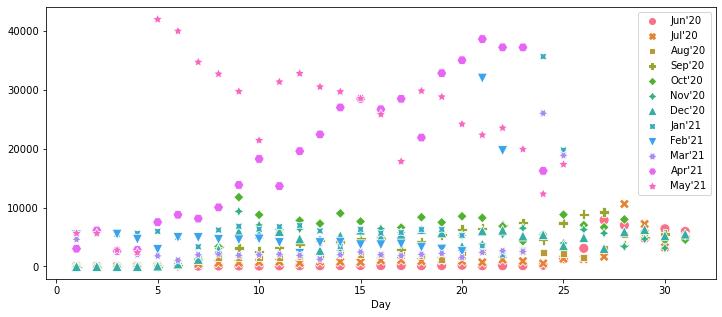

In [32]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=year_data, s=100)
plt.show()

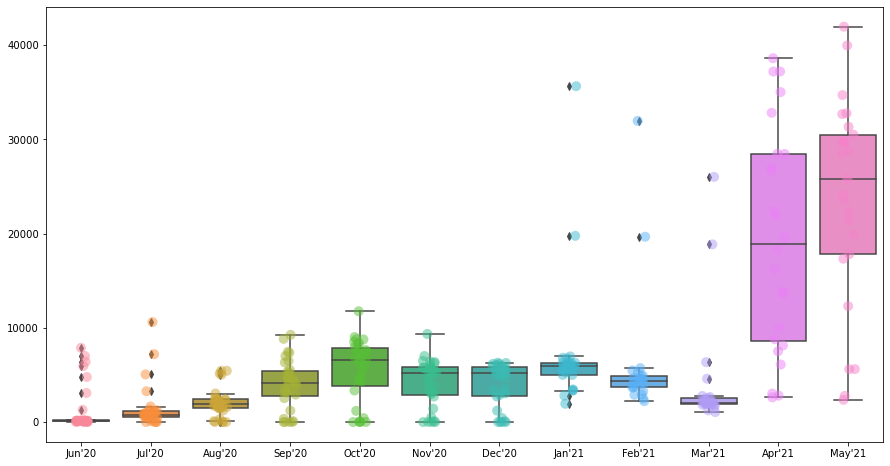

In [33]:
plt.figure(figsize=(15,8))
sns.boxplot(data=year_data)
sns.stripplot(data=year_data, s=10, alpha=0.5)
plt.show()

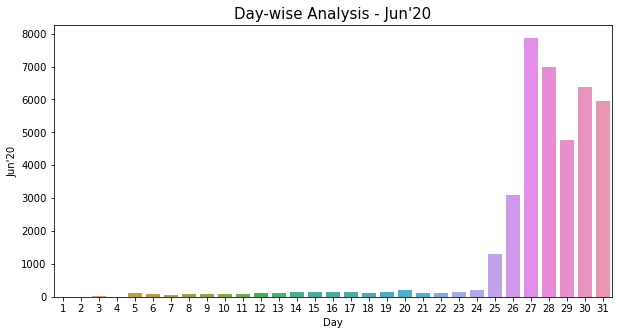

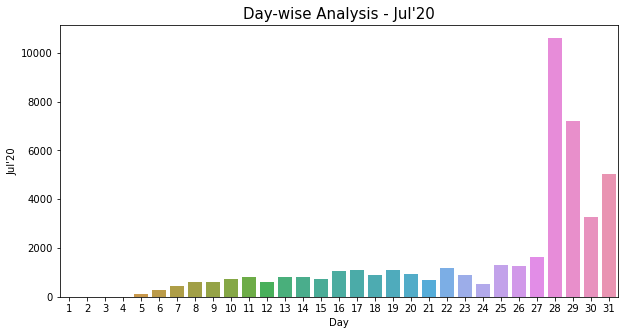

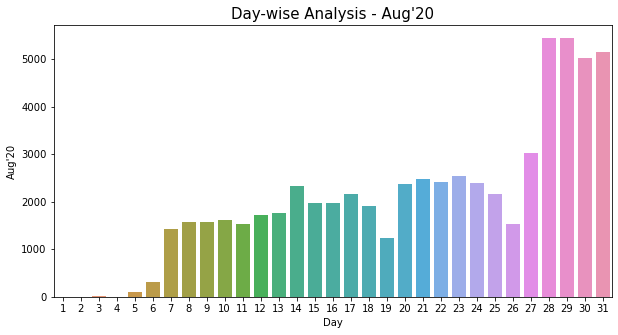

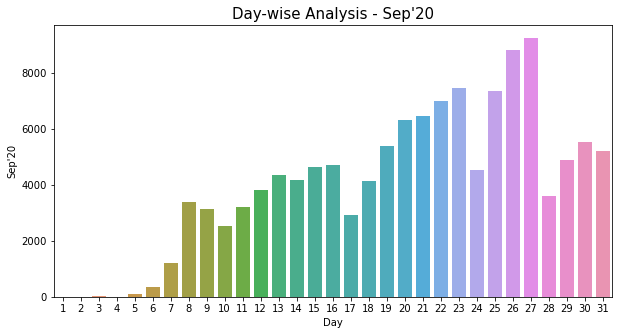

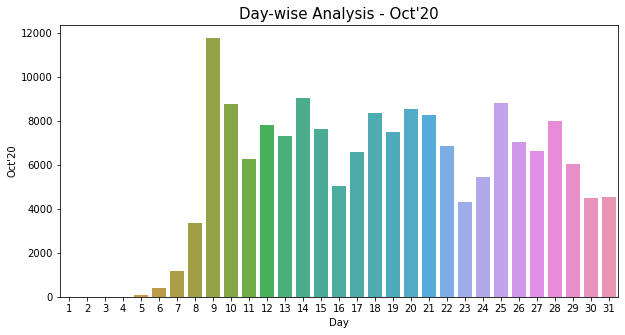

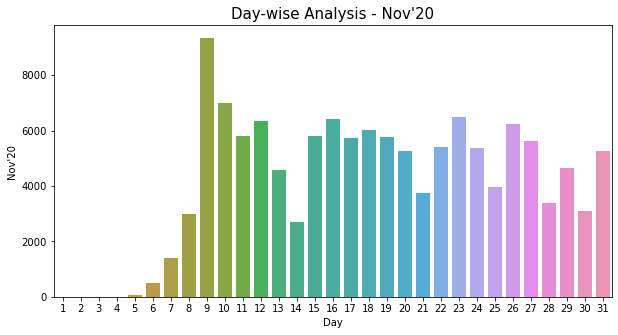

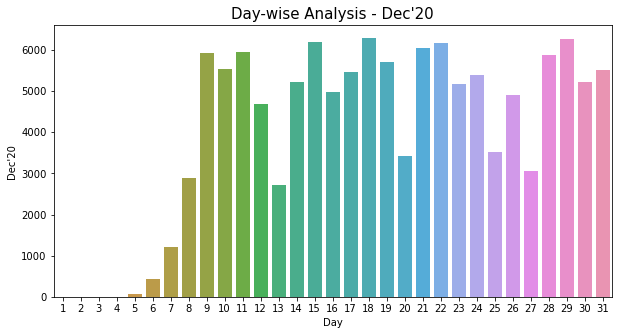

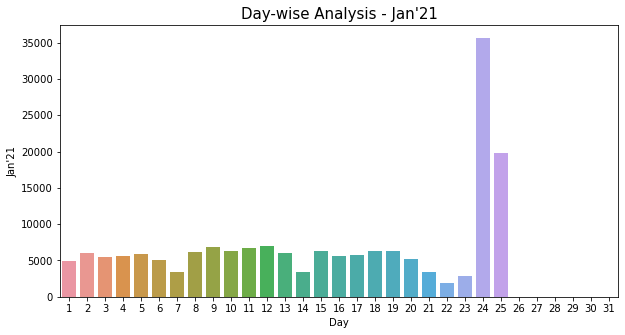

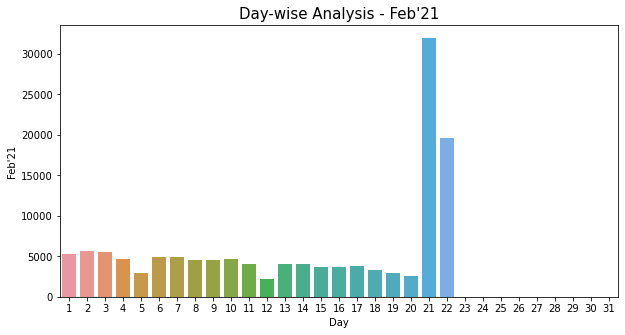

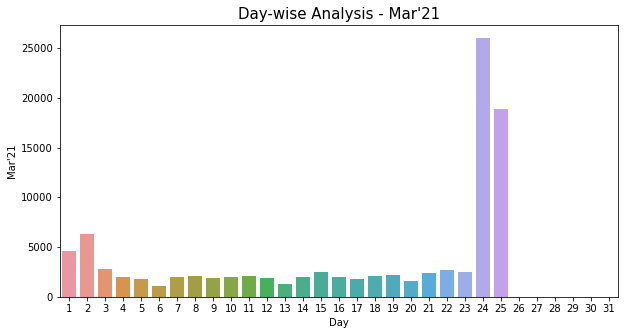

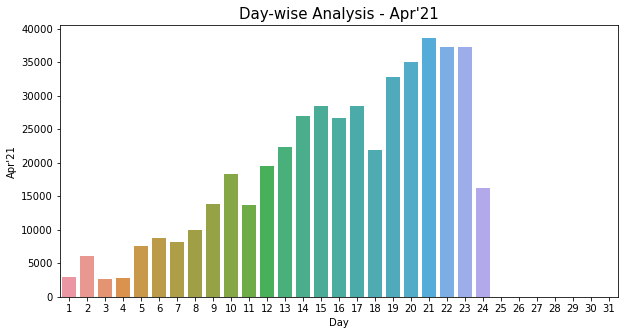

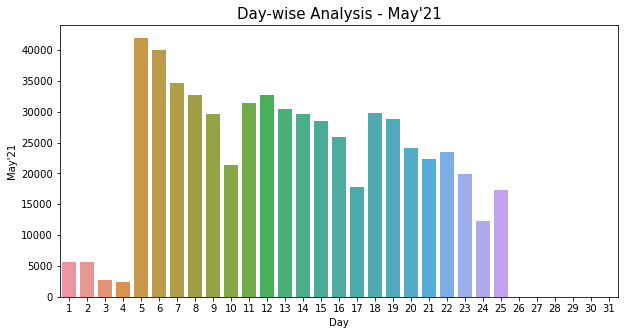

In [34]:
label = year_data.columns.tolist()
for i in range(0,12):
    plt.figure(figsize=(10,5))
    plt.title(f'Day-wise Analysis - {label[i]}', fontsize=15)
    plt.ylabel('Confirmed Cases')
    sns.barplot(year_data.index, year_data[label[i]])

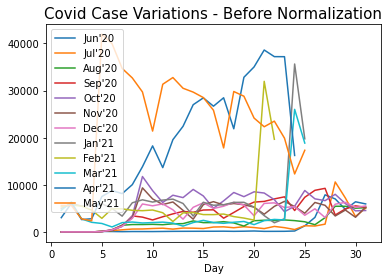

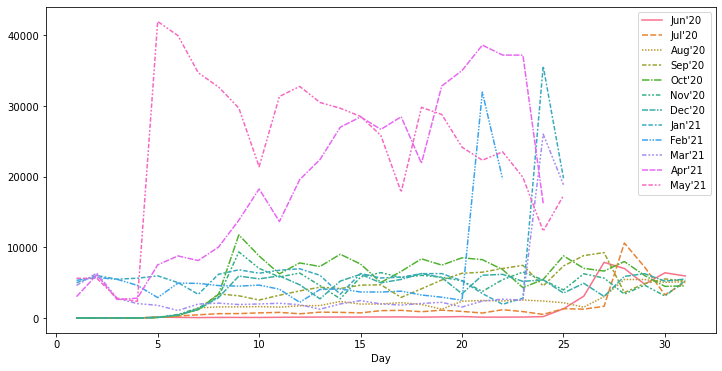

In [35]:
year_data.plot()
plt.title('Covid Case Variations - Before Normalization', fontsize=15)
plt.figure(figsize=(12,6))
sns.lineplot(data=year_data)
plt.show()

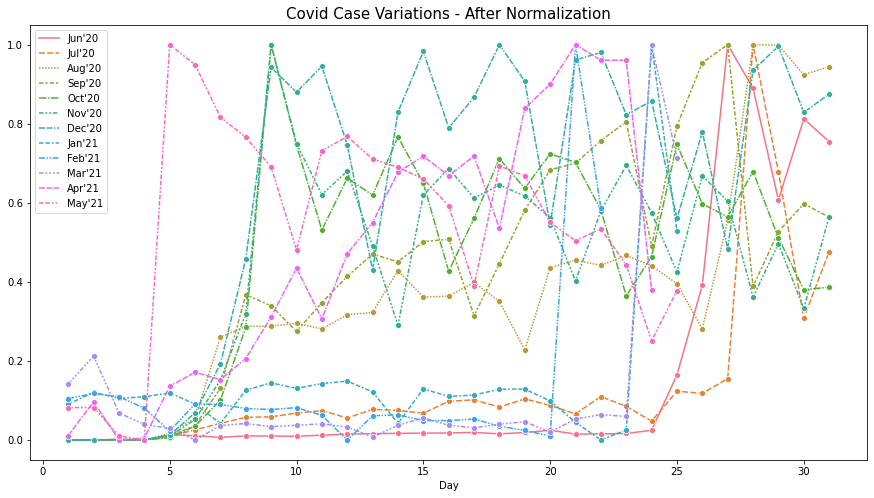

In [36]:
# Normalizing Data
norm_data = (year_data - year_data.min()) / (year_data.max() - year_data.min())

plt.figure(figsize=(15,8))
plt.title('Covid Case Variations - After Normalization', fontsize=15)
sns.lineplot(data=norm_data, marker='o')
plt.show()

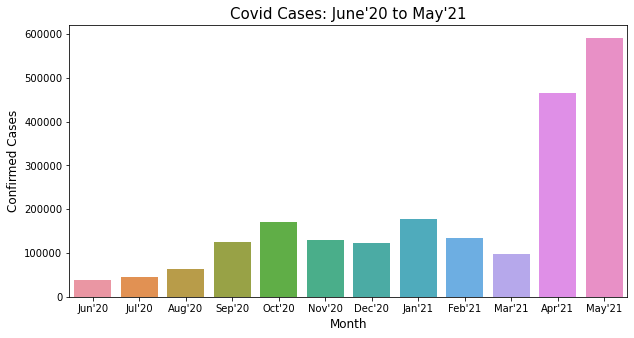

In [37]:
plt.figure(figsize=(10,5))
plt.title("Covid Cases: June'20 to May'21", fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Confirmed Cases', fontsize=12)
sns.barplot(label, year_data.sum())
plt.show()